# customer churn
In this project, I aim to analyze and examine the dataset related to customer churn. To conduct this analysis, I will use the logistic regression method. I do not have precise information about the time of data collection, but this dataset belongs to a telecommunications company that is experiencing customer churn, as its customers are switching to competitors. The company aims to identify customer behavior patterns and understand the reasons behind churn in order to develop effective strategies for reducing customer attrition.
The dataset has been provided as an attachment.

## Importing the required packages

In [36]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Calling Dataset


Each column in this dataset represents a customer attribute that may be relevant in analyzing customer churn.
In this dataset churn means: Indicates whether the customer has left the company (1 = churned, 0 = retained).

In [37]:
df=pd.read_csv(r"D:\ReGression\log\churndata.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [38]:
print(df.columns)

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')


In [40]:
df['churn'] = df['churn'].astype('int')

In [41]:
df.shape

(200, 28)

In [42]:
df.isnull().any()

tenure      False
age         False
address     False
income      False
ed          False
employ      False
equip       False
callcard    False
wireless    False
longmon     False
tollmon     False
equipmon    False
cardmon     False
wiremon     False
longten     False
tollten     False
cardten     False
voice       False
pager       False
internet    False
callwait    False
confer      False
ebill       False
loglong     False
logtoll     False
lninc       False
custcat     False
churn       False
dtype: bool

In [44]:
#separating the predictor and target variables
X=np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat']])

y=np.asarray(df["churn"])

In [45]:
#Normalizing variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.fit_transform(X)
print(X[:5])

[[-1.14 -0.63 -0.46  0.48  1.7  -0.58 -0.86  0.65  1.56 -0.75  0.48 -0.81
   0.06  1.09 -0.72 -0.36 -0.56  1.55  1.62 -0.89  1.09  1.08 -0.89 -0.98
  -0.7   1.28  1.42]
 [-0.12 -0.63  0.03 -0.33 -0.64 -1.14 -0.86 -1.55 -0.64 -0.24 -0.85 -0.81
  -0.97 -0.57 -0.39 -0.62 -0.69 -0.65 -0.62 -0.89 -0.91 -0.92 -0.89  0.07
   0.04 -0.6  -1.37]
 [-0.58 -0.86 -0.26 -0.35 -1.42 -0.92 -0.86 -1.55 -0.64 -0.56 -0.85 -0.81
  -0.97 -0.57 -0.56 -0.62 -0.69 -0.65 -0.62 -0.89 -0.91  1.08 -0.89 -0.48
   0.04 -0.73  0.49]
 [ 0.12 -0.47 -0.66  0.01 -0.64 -0.03  1.16  0.65  1.56 -0.58  2.04  1.76
   0.6   2.44 -0.45  1.67  0.24  1.55  1.62  1.13  1.09  1.08  1.13 -0.54
   2.06  0.51  1.42]
 [-1.32 -0.47  0.23  0.04 -0.64  0.53 -0.86  0.65 -0.64 -0.48  0.56 -0.81
   0.64 -0.57 -0.71 -0.42 -0.54  1.55 -0.62 -0.89  1.09  1.08 -0.89 -0.32
  -0.49  0.57  0.49]]


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(160, 27) (160,)
(40, 27) (40,)


In [47]:
#Fitting model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [48]:
# Predict the class labels for X_test
yhat=LR.predict(X_test) 
print(yhat, y_test)


[0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 1] [0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0]


predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [49]:
#predict the probability of class label for X_test
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.61, 0.39],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.65, 0.35],
       [0.58, 0.42],
       [0.61, 0.39],
       [0.49, 0.51],
       [0.63, 0.37],
       [0.37, 0.63],
       [0.58, 0.42],
       [0.44, 0.56],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.38, 0.62],
       [0.69, 0.31],
       [0.53, 0.47],
       [0.5 , 0.5 ],
       [0.54, 0.46],
       [0.43, 0.57],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.41, 0.59],
       [0.8 , 0.2 ],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.75, 0.25],
       [0.39, 0.61],
       [0.42, 0.58],
       [0.54, 0.46],
       [0.82, 0.18],
       [0.75, 0.25],
       [0.61, 0.39],
       [0.32, 0.68],
       [0.73, 0.27],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.37, 0.63],
       [0.6 , 0.4 ],
       [0.84, 0.16],
       [0.37, 0.63]])

The Jaccard index evaluates the degree of alignment between the model's predictions and actual values. The closer this index is to one, the higher the model's accuracy and reliability in predictions. Conversely, the closer it is to zero, the lower the model's accuracy, indicating an increase in prediction errors.

In [52]:
from sklearn.metrics import jaccard_score
JS=jaccard_score(y_test, yhat,pos_label=0)
print(JS)

0.5454545454545454


In [51]:
from sklearn.metrics import confusion_matrix
# محاسبه ماتریس درهم‌ریختگی
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
# نمایش ماتریس
print("Confusion Matrix:")
print(cnf_matrix)


Confusion Matrix:
[[ 7  8]
 [ 7 18]]


Confusion matrix, without normalization
[[ 7  8]
 [ 7 18]]
Normalized confusion matrix
[[0.47 0.53]
 [0.28 0.72]]


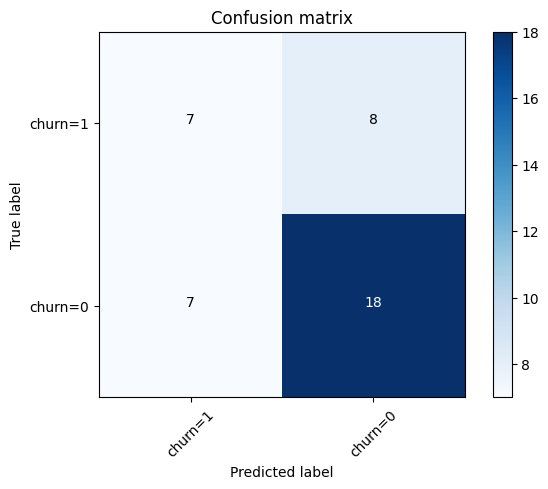

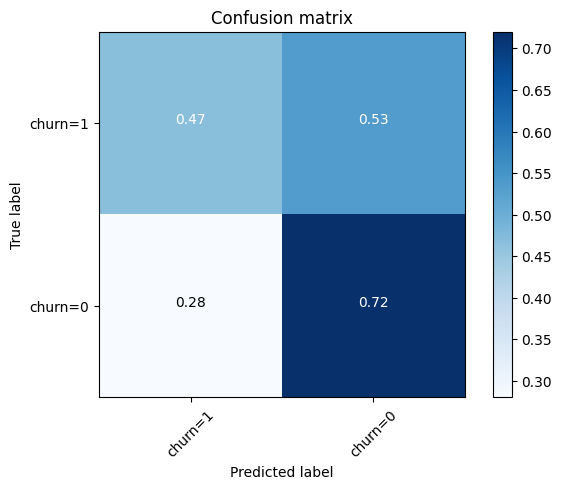

In [33]:
#نمایش ماتریس درهم دریختگی
plt.figure()
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= True,  title='Confusion matrix')


- In the first output, the first row represents customers who actually intended to leave the company. The total number of these customers is 15 (8+7). The model correctly identified 7 customers as class 1, but mistakenly classified 8 customers as class 0. This indicates that the model has struggled to accurately recognize some customers who intended to leave and has incorrectly predicted a significant portion as staying. This error is evident in the first row of the confusion matrix.

- Now, let's examine the second row. A total of 25 customers (7+18) did not intend to leave the company. The model correctly classified 18 of them as 0, but wrongly predicted 7 customers as 1.

- Conclusion: This analysis shows that the model performs better in predicting class 0, focusing more on customers who are likely to stay. However, for customers who actually intend to leave, the model exhibits weaker performance with a higher error rate.

In [34]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40



In [53]:

from sklearn.metrics import log_loss
logloss=log_loss(y_test, yhat_prob)
print(logloss)

0.6328239710889155


Overall, the model has not performed well in correctly predicting the classes, and its error rate is high. To improve the model's accuracy, it is recommended to change the "solve"r parameter in the following code:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

In [54]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat2=LR2.predict(X_test) 
#print(yhat2, y_test)
yhat_prob2 = LR2.predict_proba(X_test)
#print(yhat_prob2)
JS2=jaccard_score(y_test, yhat2,pos_label=0)
logloss2=log_loss(y_test, yhat_prob2)
print(f'jaccard score',JS,JS2)
print(f'log_loss',logloss,logloss2)

jaccard score 0.5454545454545454 0.6410256410256411
log_loss 0.6328239710889155 0.6438768070844569


By changing the solver parameter, the model has improved to some extent, and its performance has become better. This adjustment has increased the model's accuracy and reduced the error rate in class predictions.